Running Analysis — Track vs Coastal Path
This notebook analyzes my personal running sessions from March to August 2025.
The goal is to answer this question:
Why is my average pace consistently better on the track than on the coastal path, even at a similar heart rate?
This analysis compares my running sessions on two surfaces:
•	Track (200m track, not very flat surface)
•	Coastal Road ( path along the seaside, not very flat, no slopes, not on sand)
We explore several hypotheses:
1.	Heart rate vs pace → For the same heart rate (effort), pace is faster on track than on coastal path?
2.	Session type comparison → Does it depend on session type?
3.	Elevation gain → Does terrain profile explain the difference?
4.	Time evolution → Did progression/regression influence the results? 
5.	Distance effect → Do I run longer sessions on the coastal path?
Dataset
•	File: run2025.csv 
•	Features: Date, Distance, Type, Time, Location, average pace, Average Heart rate, Elevation gain, Average power and max altitude.




## 1. Pace vs Heart Rate by Location

For the same heart rate (effort), pace is faster on track than on coastal path.

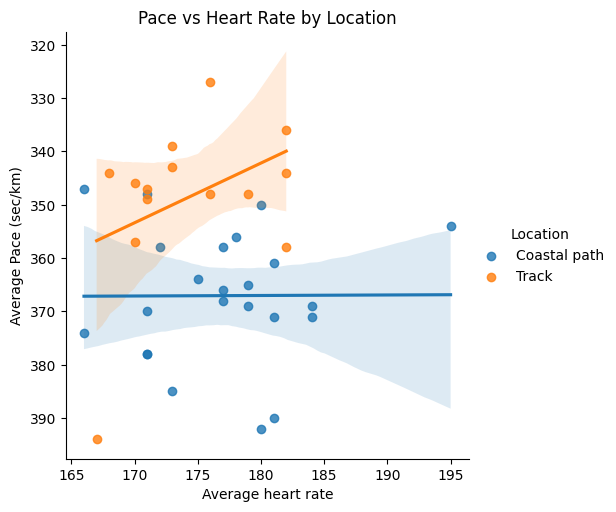

In [5]:
# we draw an lmplot to visualize the relationship
sns.lmplot(x="Avg HR", y="Pace_sec/km", hue="Location", data=runLoua_data)
plt.xlabel("Average heart rate")
plt.ylabel("Average Pace (sec/km)")
plt.title("Pace vs Heart Rate by Location")
plt.gca().invert_yaxis() 
plt.show()

## 2. Average Pace by Session Type and Surface

We now compare the pace depending on the session type (Intervals, Tempo, Threshold) and the surface (track/beach).



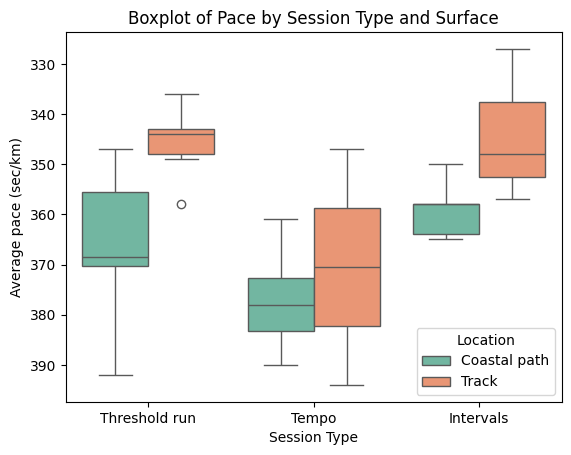

In [6]:
sns.boxplot(x="Type", y="Pace_sec/km", hue="Location",  data=runLoua_data, palette="Set2")
plt.gca().invert_yaxis()
plt.title("Boxplot of Pace by Session Type and Surface")
plt.xlabel("Session Type")
plt.ylabel("Average pace (sec/km)")
plt.show()

Even when comparing the same type of workout, the surface is still impactful.

## 3. Elevation Gain vs Pace

## Does elevation gain explain the pace difference between surfaces?


To help you visualize, the track I run on is 200 m long and nearly flat: the elevation changes are barely a meter, so there are no real slopes. We still get a good total of positive elevation gain because I run many laps, and it adds up. On the Coastal Path, there’s only the first small downhill; the rest of the route is flat, with no uphill towards the end.

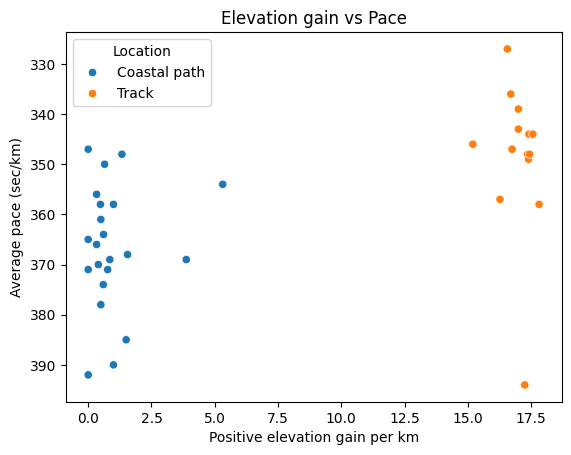

In [7]:
runLoua_data["pos_elev_gain/km"] = runLoua_data["Elev gain"] / runLoua_data["Distance"].replace(0, pd.NA)

sns.scatterplot(x="pos_elev_gain/km", y="Pace_sec/km", hue="Location", data=runLoua_data)
plt.gca().invert_yaxis()
plt.xlabel("Positive elevation gain per km")
plt.ylabel("Average pace (sec/km)")
plt.title("Elevation gain vs Pace")
plt.show()

Positive elevation gain usually slows down a run. Here, the values might suggest real slopes, but knowing the track well, I know these are just tiny bumps that accumulate over many laps, along with minor variations caused by watch noise. Yet, even these micro-slopes don’t slow me down compared to the Coastal Path, which has much lower positive elevation gain. The difference in speed therefore cannot be explained by elevation: despite a much higher cumulative gain on the track, i am clearly faster.

## 4. Monthly Evolution of Average Pace by Surface

Do I always run slower on the coastal path, or does it vary over time?


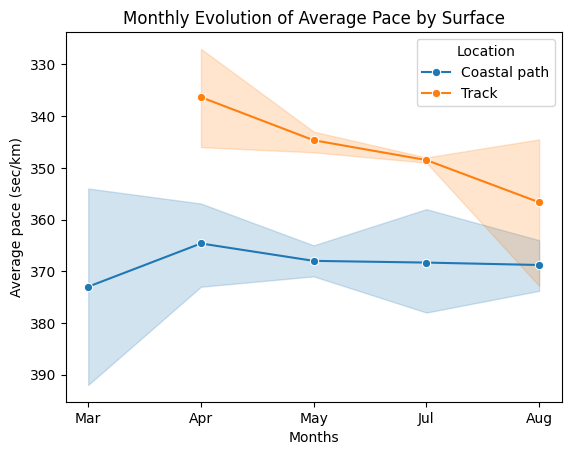

In [8]:
runLoua_data["Month"]=runLoua_data["Date"].dt.strftime("%b")

sns.lineplot(x="Month", y="Pace_sec/km", hue="Location", data=runLoua_data, marker="o")
plt.gca().invert_yaxis()
plt.xlabel("Months")
plt.ylabel("Average pace (sec/km)")
plt.title("Monthly Evolution of Average Pace by Surface")
plt.show()

In [ ]:
5. Is the distance covered the same?

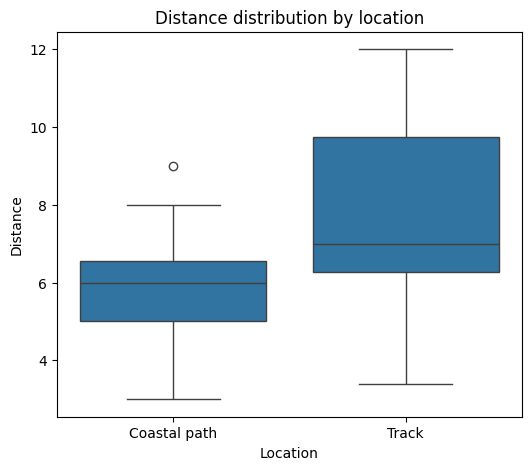

In [9]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Location", y="Distance", data=runLoua_data)
plt.title("Distance distribution by location")
plt.show()

The distance covered on the track is generally higher, which in itself does not explain why I run faster on the track.

## Conclusion

Main takeaways:
-  For the same heart rate, pace is clearly faster on track than on beach.
-  The difference remains for each session type.
-  Elevation gain cannot explain the slower beach pace.
-  The surface impact is consistent across months.
-  The distance does not explain the pace difference.
## ANSWER HERE
I eventually realized that all these data points, which usually have a big impact on how a run unfolds, still can’t explain this big difference in pace that really matters to runners. It’s not the elevation, the distance, the heart effort, or even the type of workout. I thought about other factors, like temperature, but the difference remains during the same season. Then I figured it might be the course itself: on the track the route is more regular, without obstacles, the surface is uniform, and I don’t waste energy trying to stabilize my footing. In the end, these factors convinced me the most, because I can actually feel it when I run: going around in loops gives me confidence and puts me at ease.